# Capstone Project

Health and Nutrition Data from CDC and NHANES

In [2]:
import pandas as pd
#pd.set_option('display.max_rows', None)

In [3]:
pwd

'c:\\Users\\kdura\\documents\\neuefische\\Capstone\\scripts'

In [4]:
demo = pd.read_csv("../data/NHANES_2017-2018/demographics2017.csv")
#demo_var = pd.read_excel("../data/NHANES_2017-2018/demographics_variables.xlsx").iloc[:,0:2]

diet = pd.read_csv("../data/NHANES_2017-2018/dietary2017.csv")
#diet_var = pd.read_excel("../data/NHANES_2017-2018/dietary_variables.xlsx").iloc[:,0:2]

exam = pd.read_csv("../data/NHANES_2017-2018/examination2017.csv")
#exam_var = pd.read_excel("../data/NHANES_2017-2018/examination_variables.xlsx")

lab = pd.read_csv("../data/NHANES_2017-2018/laboratory2017.csv")
#lab_var = pd.read_excel("../data/NHANES_2017-2018/laboratory_variables.xlsx")

quest = pd.read_csv("../data/NHANES_2017-2018/questionnaire2017.csv")
#quest_var = pd.read_excel("../data/NHANES_2017-2018/questionnaire_variables.xlsx")


C:\Users\kdura\AppData\Local\Temp\ipykernel_24196\2983710063.py:7: DtypeWarning: Columns (87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  exam = pd.read_csv("../data/NHANES_2017-2018/examination2017.csv")
C:\Users\kdura\AppData\Local\Temp\ipykernel_24196\2983710063.py:13: DtypeWarning: Columns (807,808,810,811,827,828) have mixed types. Specify dtype option on import or set low_memory=False.
  quest = pd.read_csv("../data/NHANES_2017-2018/questionnaire2017.csv")


# Data Clean-up

## Demographic

We want only certain variables! Filter for those :)

In [5]:
demo_clean = demo.loc[:,[
    "SEQN",                 # ID
    "RIAGENDR",             # Gender
    "RIDAGEYR",             # Age
    "RIDRETH3",             # Ethnicity
    "DMDBORN4",             # Country of Birth
    "DMDCITZN",             # US-Citizenship
    "DMDEDUC2",             # Highschool Grad?
    "DMDEDUC3",             # College Degree?
    "DMDHHSIZ",             # Household Size
    "DMDHHSZA",             # No of Kids < 6 yr in Household?
    "DMDHHSZB",             # No of Kids between 6 and 17
    "INDFMIN2",             # Total family Income
    "RIDEXPRG"              # Pregnancy status
    ]]

In [6]:
demo_columns = {
    "SEQN" : "ID",
    "RIAGENDR": "gender",
    "RIDAGEYR": "age",
    "RIDRETH3": 'ethnicity',
    "DMDBORN4": "country_of_birth",
    "DMDCITZN": "us_citizen",
    "DMDEDUC2": "education_adult",
    "DMDEDUC3": "education_adolescent",
    "DMDHHSIZ": "household_size",
    "DMDHHSZA": "no_of_kids_u6",
    "DMDHHSZB": "no_of_kids_btw_6_17",
    "INDFMIN2": "total_income",
    "RIDEXPRG": "pregnancy_status"
    }


In [7]:
demo_clean.rename(columns=demo_columns, inplace = True)

In [8]:
demo_clean

,ID,gender,age,ethnicity,country_of_birth,us_citizen,education_adult,education_adolescent,household_size,no_of_kids_u6,no_of_kids_btw_6_17,total_income,pregnancy_status
0,93703.0,2.0,2.0,6.0,1.0,1.0,NaN,NaN,5.0,3.0,0.0,15.0,NaN
1,93704.0,1.0,2.0,3.0,1.0,1.0,NaN,NaN,4.0,2.0,0.0,15.0,NaN
2,93705.0,2.0,66.0,4.0,1.0,1.0,2.0,NaN,1.0,0.0,0.0,3.0,NaN
3,93706.0,1.0,18.0,6.0,1.0,1.0,NaN,15.0,5.0,0.0,0.0,NaN,NaN
4,93707.0,1.0,13.0,7.0,1.0,1.0,NaN,6.0,7.0,0.0,3.0,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9249,102952.0,2.0,70.0,6.0,2.0,1.0,3.0,NaN,2.0,0.0,0.0,4.0,NaN
9250,102953.0,1.0,42.0,1.0,2.0,2.0,3.0,NaN,1.0,0.0,0.0,12.0,NaN
9251,102954.0,2.0,41.0,4.0,1.0,1.0,5.0,NaN,7.0,3.0,1.0,10.0,2.0
9252,102955.0,2.0,14.0,4.0,1.0,1.0,NaN,8.0,4.0,0.0,1.0,9.0,NaN


## Dietary Data Filtering

In [9]:
diet_clean = diet.loc[:,[
    'SEQN',                 # ID
    'DR1TKCAL',             # Total Calories
    'DR1TPROT',             # Total Protein
    'DR1TCARB',             # Total Carbohydrates
    'DR1TSUGR',             # Total Sugar
    'DR1_320Z',             # Total Water drank
    'DR1TTFAT',             # Total Fat
    'DR1TMFAT',             # MUFA
    'DR1TPFAT',             # PUFA
    'DR1TCHOL',             # Cholesterin
    'DR1TFIBE',             # Total Fiber
    'DR1TALCO',             # Total Alcohol
    'DR1TVARA',             # Vit A
    'DR1TVB1',              # Vit B1 (Thiamin)
    'DR1TVB2',              # Vit B2 (Riboflavin)
    'DR1TNIAC',             # Vit B3 (Niacin)
    'DR1TVB6',              # Vit B6 (Pyridoxin)
    'DR1TFA',               # Vit B9 (Folic Acid)
    'DR1TVB12',             # Vit B12 (Cobalamin)
    'DR1TVC',               # Vit C
    'DR1TVD',               # Vit D
    'DR1TATOC',             # Vit E
    'DR1TCALC',             # Calcium
    'DR1TIRON',             # Iron
    'DR1TZINC',             # Zinc
    'DR1TSODI',             # Sodium
    'DR1TPOTA',             # Potassium
    'DR1TCAFF'              # Caffeine
    ]]




In [10]:
diet_columns = {
    'SEQN': 'ID',
    'DR1TKCAL': 'daily_calories',
    'DR1TPROT': 'total_protein',
    'DR1TCARB': 'total_carbohydrates',
    'DR1TSUGR': 'total_sugar',
    'DR1_320Z': 'total_water',
    'DR1TTFAT': 'total_fat',
    'DR1TMFAT': 'mufa',
    'DR1TPFAT': 'pufa',
    'DR1TCHOL': 'cholesterin_diet',
    'DR1TFIBE': 'total_fiber',
    'DR1TALCO': 'total_alcohol',
    'DR1TVARA': 'vit_a',
    'DR1TVB1': 'vit_b1',
    'DR1TVB2': 'vit_b2',
    'DR1TNIAC': 'vit_b3',
    'DR1TVB6': 'vit_b6',
    'DR1TFA': 'vit_b9',
    'DR1TVB12': 'vit_b12',
    'DR1TVC': 'vit_c',
    'DR1TVD': 'vit_d_diet',
    'DR1TATOC': 'vit_e',
    'DR1TCALC': 'calcium',
    'DR1TIRON': 'iron',
    'DR1TZINC': 'zinc',
    'DR1TSODI': 'sodium',
    'DR1TPOTA': 'potassium',
    'DR1TCAFF': 'caffeine'
}



In [11]:
diet_clean.rename(columns=diet_columns, inplace = True)

In [12]:
diet_clean

,ID,daily_calories,total_protein,total_carbohydrates,total_sugar,total_water,total_fat,mufa,pufa,cholesterin_diet,...,vit_b12,vit_c,vit_d_diet,vit_e,calcium,iron,zinc,sodium,potassium,caffeine
0,93703.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,1230.0,51.58,160.46,76.97,240.0,43.24,14.333,12.506,144.0,...,3.83,60.1,8.1,5.80,700.0,3.55,4.18,2198.0,1970.0,8.0
2,93705.0,1202.0,20.01,157.45,91.55,315.0,56.98,16.432,19.786,14.0,...,0.33,21.4,0.2,5.66,314.0,8.80,2.93,3574.0,1640.0,361.0
3,93706.0,1987.0,94.19,89.82,14.73,3042.0,137.39,45.805,49.873,462.0,...,2.30,9.7,0.7,10.02,869.0,8.52,8.05,3657.0,1247.0,0.0
4,93707.0,1775.0,59.48,188.15,84.22,1785.0,89.18,33.712,12.424,585.0,...,2.08,12.9,2.7,8.92,535.0,8.42,8.30,2450.0,1769.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9249,102902.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9250,102928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9251,102931.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9252,102940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Examination Data Filtering

In [13]:
exam_clean = exam.loc[:,[
    'SEQN',                 # ID
    'BMXWT',                # Weight
    'BMXHT',                # Height
    'BMXBMI',               # BMI
    'BMXWAIST',             # Waist circumference
    'BPXSY1',               # Systolic BP
    'BPXDI1',               # Diastolic BP
    'BPXPULS'               # Pulse
    ]]


In [14]:
exam_columns = {
    'SEQN': 'ID',
    'BMXWT': 'weight',
    'BMXHT': 'height',
    'BMXBMI': 'bmi',
    'BMXWAIST': 'waist_circumference',
    'BPXSY1': 'systolic_bp',
    'BPXDI1': 'diastolic_bp',
    'BPXPULS': 'pulse'
}



In [15]:
exam_clean.rename(columns=exam_columns, inplace = True)

In [16]:
exam_clean

,ID,weight,height,bmi,waist_circumference,systolic_bp,diastolic_bp,pulse
0,93706.0,66.3,175.7,21.5,79.3,112.0,74.0,1.0
1,93707.0,45.4,158.4,18.1,64.1,128.0,38.0,1.0
2,93709.0,88.8,151.1,38.9,113.0,120.0,66.0,1.0
3,93712.0,58.9,172.8,19.7,72.0,112.0,68.0,1.0
4,93715.0,65.6,170.6,22.5,89.7,112.0,60.0,1.0
...,...,...,...,...,...,...,...,...
8699,102949.0,76.9,180.1,23.7,85.5,120.0,72.0,1.0
8700,102951.0,23.8,108.9,20.1,62.2,NaN,NaN,1.0
8701,102953.0,97.4,164.9,35.8,114.8,124.0,76.0,1.0
8702,102954.0,69.1,162.6,26.1,86.4,116.0,66.0,1.0


## Laboratory Data Filtering

In [17]:
lab_clean = lab.loc[:,[
    'SEQN',             # ID
    'LBXGLU',           # Glucose in Blood mg/dL
    'LBDINSI',          # Insulin pmol/L
    'LBXTC',            # Cholesterol mg/dL
    'LBXTR',            # Triglyceride mg/dL
    'LBDLDL',           # LDL-cholesterol mg/dL
#   'LBXSAL',           # Albumin
#   'LBXSATSI',         # Alanine Aminotransferase ALT U/L
    'LBXSGTSI',         # Gamma glutamyl transferase
    'LBXSAPSI',         # Alkaline phosphatase (IU/L)
    'LBXVIDMS',         # vitamin D2 + D3
    'URXUCR',           # Urinary creatinine (mg/dL)
    'URXUMA',           # Albumin, urine (ug/mL)
    'URDACT'            # Albumin creatinine ratio (mg/g)
]]



In [18]:
lab_columns = {
    'SEQN': 'ID',
    'LBXGLU': 'blood_glucose',
    'LBDINSI': 'insulin',
    'LBXTC': 'cholesterin_lab',
    'LBXTR': 'triaclyglycerole',
    'LBDLDL': 'ldl',
#   'LBXSAL': 'albumin',
#   'LBXSATSI': 'ALT',
    'LBXSGTSI': 'gamma_glutamyl_transferase',
    'LBXSAPSI': 'alkaline_phosphatase',
    'LBXVIDMS': 'vit_d_lab',
    'URXUCR': 'urinary_creatinine',
    'URXUMA': 'albumine',
    'URDACT': 'albumine_creatinine_ratio'
}



In [19]:
lab_clean.rename(columns=lab_columns, inplace = True)

In [20]:
lab_clean.head()

,ID,blood_glucose,insulin,cholesterin_lab,triaclyglycerole,ldl,gamma_glutamyl_transferase,alkaline_phosphatase,vit_d_lab,urinary_creatinine,albumine,albumine_creatinine_ratio
0,93705.0,NaN,NaN,157.0,NaN,NaN,21.0,74.0,89.9,24.0,3.2,13.33
1,93706.0,NaN,NaN,148.0,NaN,NaN,16.0,79.0,53.8,69.0,39.6,57.39
2,93707.0,NaN,NaN,189.0,NaN,NaN,9.0,238.0,58.2,209.0,41.6,19.90
3,93708.0,122.0,58.32,209.0,58.0,109.0,22.0,66.0,116.0,47.0,9.1,19.36
4,93709.0,NaN,NaN,176.0,NaN,NaN,31.0,86.0,72.8,215.0,26.4,12.28


## Questionaire Data Filtering

In [21]:
quest_clean = quest.loc[:,[
    'SEQN',                 # ID
    'PAQ620',               # Work with physical activity?
    'PAD680',               # Time spent sitting
    'PAD675',               # Time spent doing physical activities / day
    'PAQ640',               # Days on which you bike or walk more than 10 mins/week
    'MCQ010',               # Asthma?
    'MCQ080',               # Has a Doctor ever said: "you are overweight!" ?
    'MCQ220',               # Has a Doctor ever said: "You have cancer" ?
    'SMQ040',               # Do you smoke?
    'ALQ130',               # On avg how many drinks on days you drank alcohol?
    'SLQ050',               # Ever told a doctor: Trouble sleeping?
    'DIQ010'                # Has a Doctor ever told you: "You have Diabetes"?
    ]]


In [22]:
quest_columns = {
    'SEQN': 'ID',
    'PAQ620': 'physical_activity_work',
    'PAD680': 'sitting_per_day',
    'ALQ130': 'alcoholic_drinks',
    'SMQ040': 'smoker',
    'PAD675': 'sport_days',
    'PAQ640': 'walk_<10_minutes_p_day',
    'MCQ010': 'asthma',
    'MCQ080': 'overweight',
    'MCQ220': 'cancer',
    'SLQ050': 'trouble_sleeping',
    'DIQ010': 'diabetes'
}



In [23]:
quest_clean.rename(columns=quest_columns, inplace = True)

In [24]:
quest_clean

,ID,physical_activity_work,sitting_per_day,sport_days,walk_<10_minutes_p_day,asthma,overweight,cancer,smoker,alcoholic_drinks,trouble_sleeping,diabetes
0,93705.0,2.0,300.0,60.0,NaN,1.0,2.0,2.0,3.0,1.0,2.0,2.0
1,93706.0,2.0,240.0,30.0,5.0,2.0,2.0,NaN,NaN,NaN,2.0,2.0
2,93707.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0
3,93708.0,2.0,120.0,30.0,NaN,2.0,2.0,2.0,NaN,NaN,2.0,3.0
4,93709.0,1.0,600.0,NaN,NaN,2.0,1.0,2.0,1.0,NaN,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9249,102862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9250,102919.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9251,102927.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9252,102928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleanup 

### Duplicates

In [25]:
print(demo_clean.shape)
print(demo_clean.duplicated().value_counts())

(9254, 13)
False    9254
Name: count, dtype: int64


In [26]:
print(exam_clean.shape)
print(exam_clean.duplicated().value_counts())

(8704, 8)
False    8704
Name: count, dtype: int64


In [27]:
print(quest_clean.shape)
print(quest_clean.duplicated().value_counts())

(9254, 12)
False    9254
Name: count, dtype: int64


In [28]:
print(diet_clean.shape)
print(diet_clean.duplicated().value_counts())

(9254, 28)
False    9254
Name: count, dtype: int64


In [29]:
print(lab_clean.shape)
print(lab_clean.duplicated().value_counts())

(8366, 12)
False    8366
Name: count, dtype: int64


### merge data frames

In [30]:
data_merged = demo_clean.merge(diet_clean, how = 'inner', on="ID").merge(exam_clean, how='inner', on='ID').merge(lab_clean, how='inner', on='ID').merge(quest_clean, how='inner', on='ID')

In [31]:
data_merged

,ID,gender,age,ethnicity,country_of_birth,us_citizen,education_adult,education_adolescent,household_size,no_of_kids_u6,...,sitting_per_day,sport_days,walk_<10_minutes_p_day,asthma,overweight,cancer,smoker,alcoholic_drinks,trouble_sleeping,diabetes
0,93703.0,2.0,2.0,6.0,1.0,1.0,NaN,NaN,5.0,3.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0
1,93704.0,1.0,2.0,3.0,1.0,1.0,NaN,NaN,4.0,2.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0
2,93705.0,2.0,66.0,4.0,1.0,1.0,2.0,NaN,1.0,0.0,...,300.0,60.0,NaN,1.0,2.0,2.0,3.0,1.0,2.0,2.0
3,93706.0,1.0,18.0,6.0,1.0,1.0,NaN,15.0,5.0,0.0,...,240.0,30.0,5.0,2.0,2.0,NaN,NaN,NaN,2.0,2.0
4,93707.0,1.0,13.0,7.0,1.0,1.0,NaN,6.0,7.0,0.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,102952.0,2.0,70.0,6.0,2.0,1.0,3.0,NaN,2.0,0.0,...,120.0,60.0,NaN,2.0,2.0,2.0,NaN,NaN,2.0,3.0
8362,102953.0,1.0,42.0,1.0,2.0,2.0,3.0,NaN,1.0,0.0,...,360.0,NaN,NaN,1.0,1.0,2.0,3.0,12.0,1.0,2.0
8363,102954.0,2.0,41.0,4.0,1.0,1.0,5.0,NaN,7.0,3.0,...,600.0,30.0,NaN,2.0,1.0,2.0,NaN,NaN,2.0,2.0
8364,102955.0,2.0,14.0,4.0,1.0,1.0,NaN,8.0,4.0,0.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0


# De-encode Result-values

In [32]:
int_list = [
    'ID',
    'age',
    'household_size',
    'no_of_kids_u6', 
    'no_of_kids_btw_6_17',
    'sitting_per_day',
    'sport_days',
    'walk_<10_minutes_p_day',
    'alcoholic_drinks']

data_merged[int_list] = data_merged[int_list].astype('Int64')

In [33]:
# 777, 7777, 999 & 9999 are unknown or refused to say. for simplicity purposes we set all of these to 0
data_merged.replace([777, 999, 7777, 9999], 0, inplace=True)

In [34]:
#missing = data_merged.isnull().sum().sort_values(ascending=False)


In [35]:
str_list = [
       'gender',
       'country_of_birth',
       'us_citizen',
       'ethnicity',
       'education_adult',
       'education_adolescent',
       'pregnancy_status',
       'physical_activity_work',
       'asthma',
       'overweight',
       'cancer',
       'smoker',
       'trouble_sleeping',
       'diabetes']


data_merged[str_list] = data_merged[str_list].astype('str')



In [36]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8366 entries, 0 to 8365
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          8366 non-null   Int64  
 1   gender                      8366 non-null   object 
 2   age                         8366 non-null   Int64  
 3   ethnicity                   8366 non-null   object 
 4   country_of_birth            8366 non-null   object 
 5   us_citizen                  8366 non-null   object 
 6   education_adult             8366 non-null   object 
 7   education_adolescent        8366 non-null   object 
 8   household_size              8366 non-null   Int64  
 9   no_of_kids_u6               8366 non-null   Int64  
 10  no_of_kids_btw_6_17         8366 non-null   Int64  
 11  total_income                8007 non-null   float64
 12  pregnancy_status            8366 non-null   object 
 13  daily_calories              7285 

data types are correct!

now for the translation:

In [ ]:
data_merged['gender'] = data_merged['gender'].map({
    '1.0': 'male',
    '2.0': 'female'
}).fillna('unknown')

In [37]:
# country of birth:
# 1: born in usa
# 2: others
# 77 refused
# 99 dont know
# . missing

data_merged['country_of_birth'] = data_merged['country_of_birth'].map({
    '1.0': 'USA',
    '2.0': 'others'
}).fillna('unknown')

data_merged['us_citizen'].value_counts()

us_citizen
1.0    7477
2.0     861
7.0      18
9.0       7
nan       3
Name: count, dtype: int64

In [38]:
# citizen:\
# 1 born in the usa\
# 2 durch einbürgerung\
# 7 kein us-bürger\
# 9 keine angabe

data_merged['us_citizen'] = data_merged['us_citizen'].map({
    '1.0': 'US-citizen',
    '2.0': 'US-citizen',
    '7.0': 'not a citizen',
    '9.0': 'unknown'
}).fillna('unknown')
data_merged['us_citizen'].value_counts()

us_citizen
US-citizen       8338
not a citizen      18
unknown            10
Name: count, dtype: int64

In [39]:
data_merged['education_adult'] = data_merged['education_adult'].map({
    '1.0': '<9th',
    '2.0': '9-11th',
    '3.0': 'GED Grad',
    '4.0': 'some College deg',
    '5.0': 'College or abv',
    '7.0': 'unknown',
    '9.0': 'unknown'
}).fillna('unknown')

In [40]:
data_merged['education_adolescent'] = data_merged['education_adolescent'].map({
    '1.0': '<9th',
    '2.0': '<9th',
    '3.0': '<9th',
    '4.0': '<9th',
    '5.0': '<9th',
    '6.0': '<9th',
    '7.0': '<9th',
    '8.0': '<9th',
    '9.0': '9-11th',
    '10.0': '9-11th',
    '11.0': '9-11th',
    '12.0': '9-11th',
    '13.0': 'HS Grad',
    '14.0': 'GED Grad',
    '15.0': 'some College deg',
    '55.0': '<5th',
    '66.0': '<9th',
    '77.0': 'unknown',
    '99.0': 'unknown'
}).fillna('unknown')

In [41]:
# pregnancy status:\
# 1: yes\
# 2: not pregnant at exam\
# 3: unsure

data_merged['pregnancy_status'] = data_merged['pregnancy_status'].map({
    '1.0': 'pregnant',
    '2.0': 'not pregnant',
    '3.0': 'unknown'
}).fillna('unknown')
data_merged['pregnancy_status'].value_counts()

pregnancy_status
unknown         7345
not pregnant     966
pregnant          55
Name: count, dtype: int64

In [42]:
data_merged['physical_activity_work'].value_counts()

physical_activity_work
2.0    3214
nan    2833
1.0    2314
9.0       5
Name: count, dtype: int64

In [43]:
# physical activity at work\
# 1 yes\
# 2 no\
# 7 refused\
# 9 dont know\
# . missing

data_merged['physical_activity_work'] = data_merged['physical_activity_work'].map({
    '1.0': 'yes',
    '2.0': 'no',
    '9.0': 'unknown',
    '7.0': 'unknown'
}).fillna('unknown')
data_merged['physical_activity_work'].value_counts()

physical_activity_work
no         3214
unknown    2838
yes        2314
Name: count, dtype: int64

In [44]:
# ethnicity
# 1.0 mexican american
# 2.0 other hispanic
# 3.0 non-hispanic white
# 4.0 non-hispanic black
# 6.0 asian
# 7.0 others 

data_merged['ethnicity'] = data_merged['ethnicity'].map({
    '1.0': 'mexican american',
    '2.0': 'hispanic',
    '3.0': 'white',
    '4.0': 'black',
    '6.0': 'asian',
    '7.0': 'others'
}).fillna('unknown')

data_merged['ethnicity'].value_counts()

ethnicity
white               2792
black               1949
mexican american    1229
asian               1083
hispanic             738
others               575
Name: count, dtype: int64

In [45]:
# SMQ040 - smoker
# 1 every day
# 2 some days
# 3 not at all
# 7 refused
# 9 dont know
# . missing

data_merged['smoker'] = data_merged['smoker'].map({
    '1.0': 'every day',
    '2.0': 'some days',
    '3.0': 'not at all',
    '9.0': 'unknown',
    '7.0': 'unknown'
}).fillna('unknown')

data_merged['smoker'].value_counts()

smoker
unknown       6134
not at all    1260
every day      763
some days      209
Name: count, dtype: int64

In [46]:
# MCQ080 - overweight
# 1 - yes
# 2- no
# 3- refused
# 9 dont know
# . missing
data_merged['overweight'] = data_merged['overweight'].map({
    '1.0': 'yes',
    '2.0': 'no',
    '3.0': 'refused',
    '9.0': 'unknown'
}).fillna('unknown')

data_merged['overweight'].value_counts()

overweight
no         3632
unknown    2545
yes        2189
Name: count, dtype: int64

In [47]:
# MCQ220 - cancer
# 1 - yes
# 2- no
# 3- refused
# 9 dont know
# . missing

data_merged['cancer'] = data_merged['cancer'].map({
    '1.0': 'yes',
    '2.0': 'no',
    '3.0': 'refused',
    '9.0': 'unknown'
}).fillna('unknown')

data_merged['cancer'].value_counts()

cancer
no         4712
unknown    3103
yes         551
Name: count, dtype: int64

In [48]:
# MCQ010 asthma
# 1 - yes
# 2- no
# 3- refused
# 9 dont know
# . missing

data_merged['asthma'] = data_merged['asthma'].map({
    '1.0': 'yes',
    '2.0': 'no',
    '3.0': 'refused',
    '9.0': 'unknown'
}).fillna('unknown')

data_merged['asthma'].value_counts()

asthma
no         7098
yes        1261
unknown       7
Name: count, dtype: int64

In [49]:
# DIQ010 - diabetes
# 1 yes
# 2 no
# 3 borderline
# 7 ref
# 9 dont know
# . missing

data_merged['diabetes'] = data_merged['diabetes'].map({
    '1.0': 'yes',
    '2.0': 'no',
    '3.0': 'refused',
    '9.0': 'unknown'
}).fillna('unknown')

data_merged['diabetes'].value_counts()

diabetes
no         7334
yes         853
refused     175
unknown       4
Name: count, dtype: int64

In [ ]:
data_merged.to_csv("data_2017.csv")

,ID,gender,age,ethnicity,country_of_birth,us_citizen,education_adult,education_adolescent,household_size,no_of_kids_u6,...,sitting_per_day,sport_days,walk_<10_minutes_p_day,asthma,overweight,cancer,smoker,alcoholic_drinks,trouble_sleeping,diabetes
0,93703,2.0,2,asian,USA,US-citizen,unknown,unknown,5,3,...,<NA>,<NA>,<NA>,no,unknown,unknown,unknown,<NA>,nan,no
1,93704,1.0,2,white,USA,US-citizen,unknown,unknown,4,2,...,<NA>,<NA>,<NA>,no,unknown,unknown,unknown,<NA>,nan,no
2,93705,2.0,66,black,USA,US-citizen,9-11th,unknown,1,0,...,300,60,<NA>,yes,no,no,not at all,1,2.0,no
3,93706,1.0,18,asian,USA,US-citizen,unknown,some College deg,5,0,...,240,30,5,no,no,unknown,unknown,<NA>,2.0,no
4,93707,1.0,13,others,USA,US-citizen,unknown,<9th,7,0,...,<NA>,<NA>,<NA>,no,unknown,unknown,unknown,<NA>,nan,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,102952,2.0,70,asian,others,US-citizen,GED Grad,unknown,2,0,...,120,60,<NA>,no,no,no,unknown,<NA>,2.0,refused
8362,102953,1.0,42,mexican american,others,US-citizen,GED Grad,unknown,1,0,...,360,<NA>,<NA>,yes,yes,no,not at all,12,1.0,no
8363,102954,2.0,41,black,USA,US-citizen,College or abv,unknown,7,3,...,600,30,<NA>,no,yes,no,unknown,<NA>,2.0,no
8364,102955,2.0,14,black,USA,US-citizen,unknown,<9th,4,0,...,<NA>,<NA>,<NA>,no,unknown,unknown,unknown,<NA>,nan,no


<Axes: xlabel='us_citizen', ylabel='weight'>

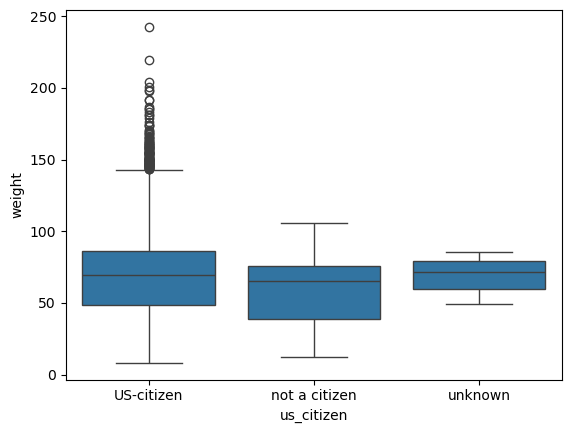

In [51]:
import seaborn as sns
sns.boxplot(data = data_merged, x = 'us_citizen', y = 'weight')

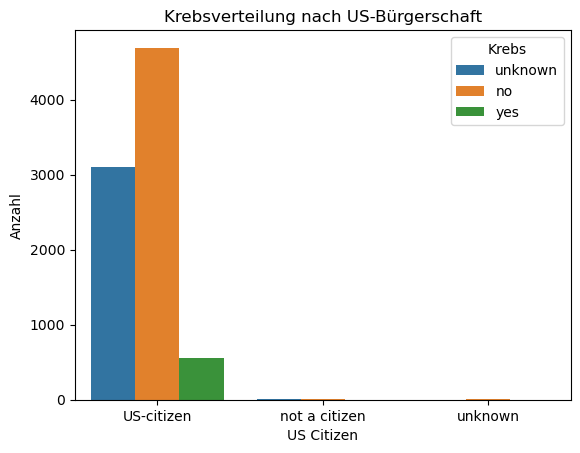

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gruppiertes Balkendiagramm
sns.countplot(data=data_merged, x='us_citizen', hue='cancer')
plt.title('Krebsverteilung nach US-Bürgerschaft')
plt.xlabel('US Citizen')
plt.ylabel('Anzahl')
plt.legend(title='Krebs')
plt.show()

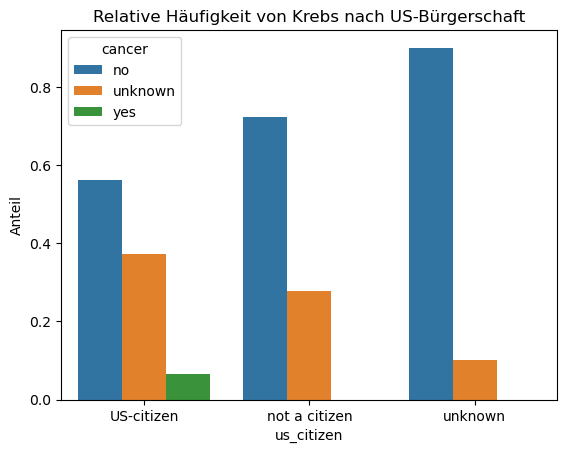

In [53]:
import pandas as pd

# Prozentualer Anteil von Krebsfällen pro US-Bürgerstatus
prop_df = data_merged.groupby('us_citizen')['cancer'].value_counts(normalize=True).rename('proportion').reset_index()

sns.barplot(data=prop_df, x='us_citizen', y='proportion', hue='cancer')
plt.title('Relative Häufigkeit von Krebs nach US-Bürgerschaft')
plt.ylabel('Anteil')
plt.show()

<Axes: xlabel='diabetes', ylabel='weight'>

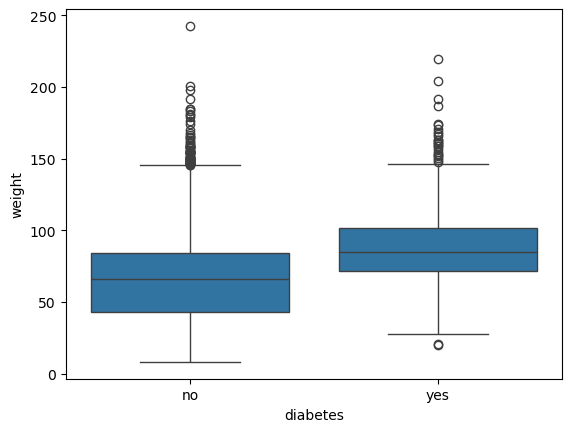

In [54]:
# filter for age groups
import seaborn as sns
import matplotlib.pyplot as plt

data_diabetes = data_merged.loc[:,['diabetes', 'weight', 'height']]

data_diabetes = data_diabetes[(data_diabetes['diabetes'] == 'yes') | (data_diabetes['diabetes'] == 'no')]

sns.boxplot(data_diabetes, x= 'diabetes', y='weight')

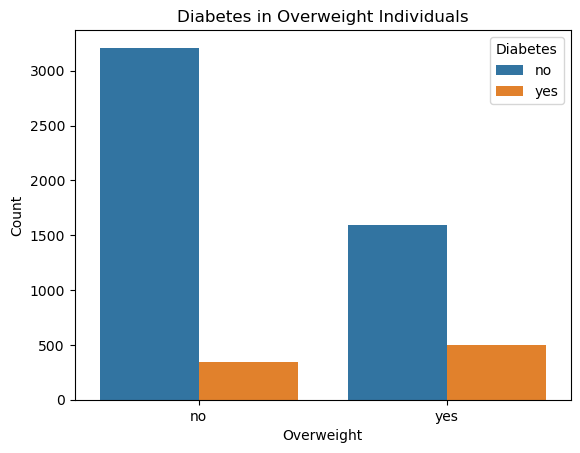

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

data_diabetes = data_merged.loc[:,['diabetes', 'weight', 'overweight', 'age']]

data_diabetes = data_diabetes[((data_diabetes['diabetes'] == 'yes') | (data_diabetes['diabetes'] == 'no')) & (data_diabetes['overweight'] != 'unknown')]

# sns.countplot(data_diabetes, x= 'overweight', y='diabetes')

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data_diabetes, x='overweight', hue='diabetes')
plt.title('Diabetes in Overweight Individuals')
plt.xlabel('Overweight')
plt.ylabel('Count')
plt.legend(title='Diabetes')
plt.show()

In [56]:
data_merged.to_csv("data_2017.csv")

In [57]:
subset_df = data_merged.loc[(data_merged['diabetes'] == 'yes') |(data_merged['diabetes'] == 'no')]
subset_df['activity_level'] = subset_df['sport_days'].apply(lambda x: '>30 min/day' if x >= 30 else 'inactive')
pd.crosstab(subset_df['activity_level'], subset_df['diabetes'])

C:\Users\kdura\AppData\Local\Temp\ipykernel_24196\3819047521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['activity_level'] = subset_df['sport_days'].apply(lambda x: '>30 min/day' if x >= 30 else 'inactive')


diabetes,no,yes
activity_level,,
>30 min/day,1558,199
inactive,5776,654


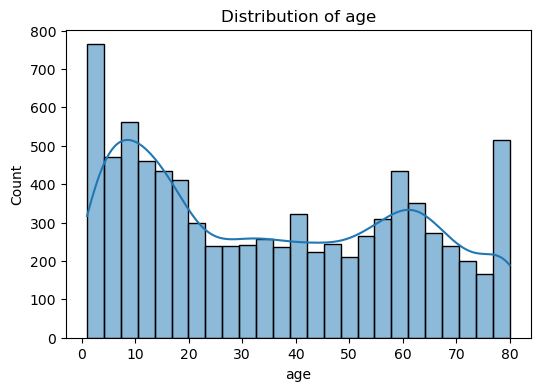

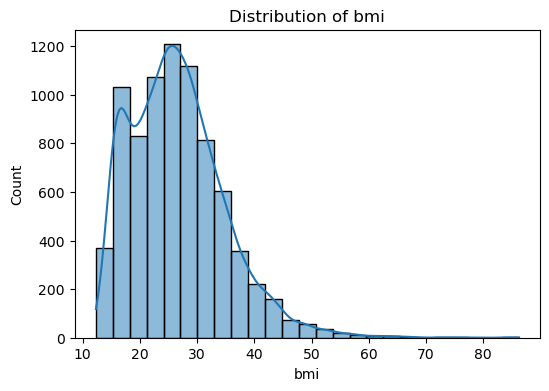

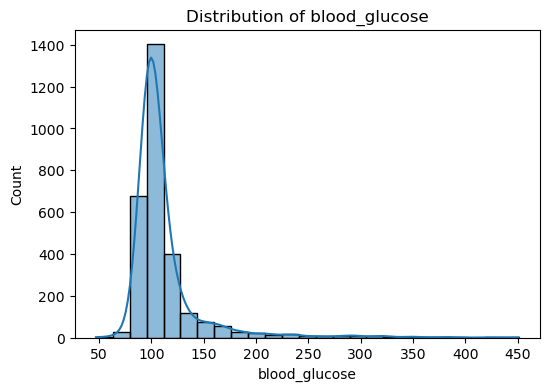

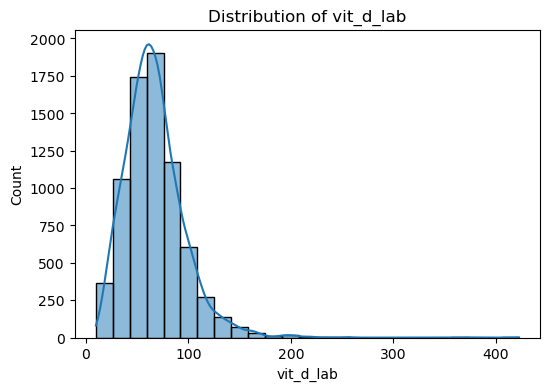

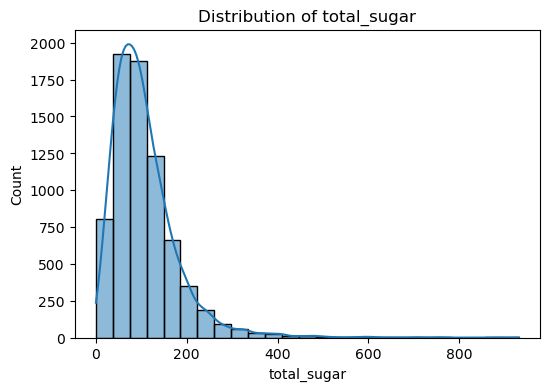

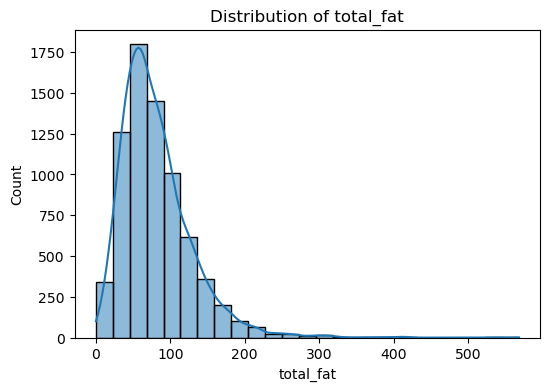

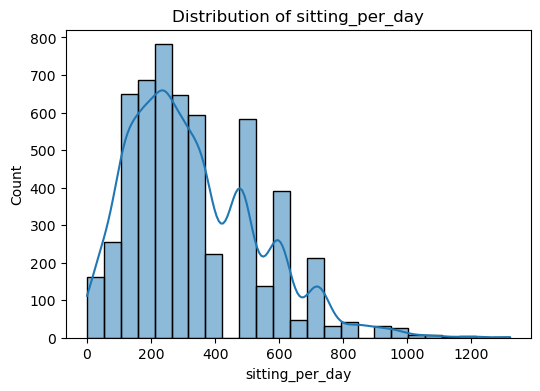

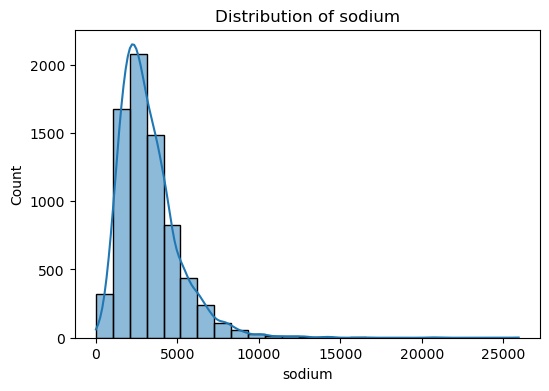

In [58]:
numerical_columns = ['age', 'bmi', 'blood_glucose', 'vit_d_lab', 'total_sugar', 'total_fat', 'sitting_per_day','sodium']

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data_merged[col], kde=True, bins=25)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

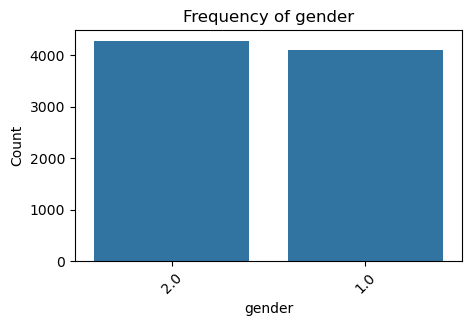

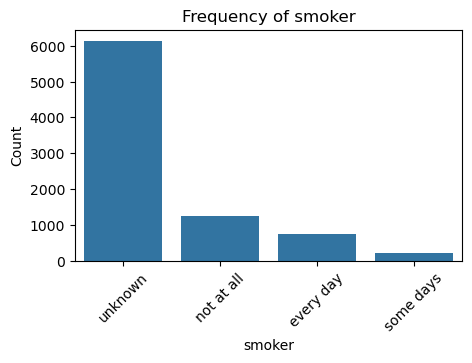

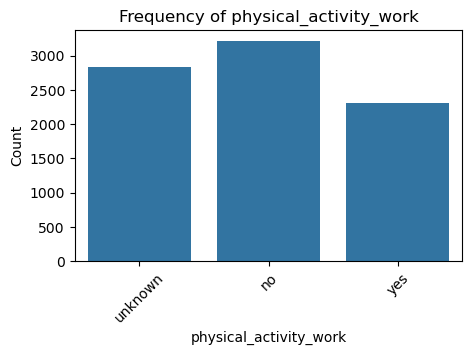

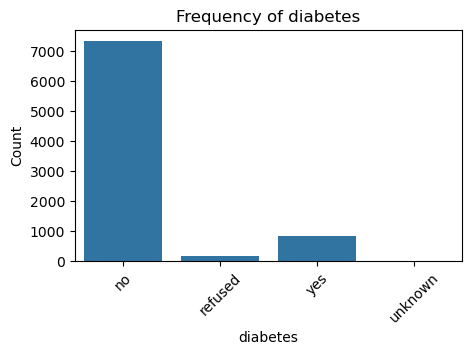

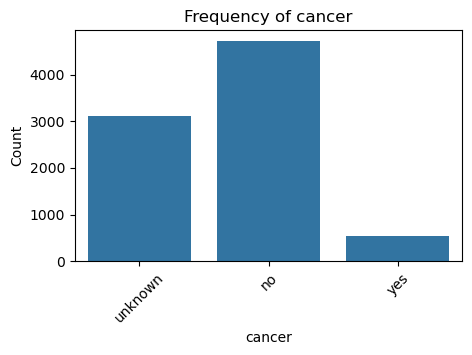

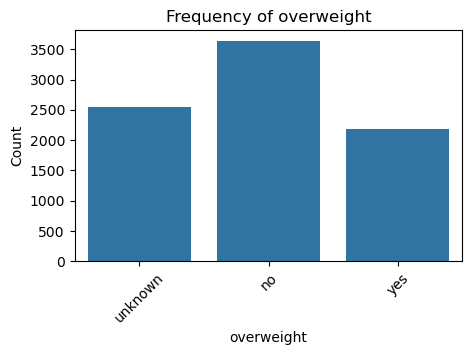

In [59]:
categorical_columns = ['gender', 'smoker', 'physical_activity_work', 'diabetes', 'cancer', 'overweight']

for col in categorical_columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=data_merged[col])
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [64]:
# Testing a Hypothese: There is a significant difference between active and non-active lifestyles on Diabetes risk
# H0: There is no relation between bodily activity and diabetes.
# H1: There is a significant relation between bodily activity and diabetes.
subset_df = data_merged.loc[(data_merged['diabetes'] == 'yes') |(data_merged['diabetes'] == 'no')]
subset_df['activity_level'] = subset_df['sport_days'].apply(lambda x: '>120 min/day' if x >= 20 else 'inactive')
pd.crosstab(subset_df['activity_level'], subset_df['diabetes'])

C:\Users\kdura\AppData\Local\Temp\ipykernel_24196\2441688835.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['activity_level'] = subset_df['sport_days'].apply(lambda x: '>120 min/day' if x >= 20 else 'inactive')


diabetes,no,yes
activity_level,,
>120 min/day,1725,224
inactive,5609,629


In [65]:
from scipy.stats import chi2_contingency
contingency = pd.crosstab(subset_df['activity_level'], subset_df['diabetes'])
chi2, p, dof, expected = chi2_contingency(contingency)
if p >= 0.05:
    print(round(p, 2))
    print('There is no significant connection between diabetes and recreational physical activity.')
else:
    print(round(p, 2))
    print('There is a significant connection between recreational physical activity and diabetes')

0.08
There is no significant connection between diabetes and recreational physical activity.
